In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Rides_DataA.csv')
df.head()

,RIDE_ID,started_on,created_date,updated_date,completed_on,distance_travelled,end_location_lat,end_location_long,driver_rating,rider_rating,...,charity_id,requested_car_category,free_credit_used,surge_factor,start_location_long,start_location_lat,rider_id,round_up_amount,promocode_redemption_id,driver_reached_on
0,0,2016-06-04 00:18:49-05:00,2016-06-04 00:10:19-05:00,2016-06-04 00:27:48-05:00,2016-06-04 00:27:32-05:00,8459.0,38.676,-121.039,5.0,5.0,...,NaN,b'REGULAR',NaN,0.0,-121.071,38.655,0,NaN,NaN,2016-06-04 00:14:11-05:00
1,1,2016-06-04 01:50:12-05:00,2016-06-04 01:47:39-05:00,2016-06-04 01:52:00-05:00,2016-06-04 01:51:49-05:00,443.0,38.676,-121.039,5.0,5.0,...,NaN,b'REGULAR',NaN,0.0,-121.038,38.679,0,NaN,NaN,2016-06-04 01:50:02-05:00
2,2,2016-06-04 03:16:02-05:00,2016-06-04 03:13:07-05:00,2016-06-04 03:18:07-05:00,2016-06-04 03:17:57-05:00,568.0,38.676,-121.039,3.0,5.0,...,NaN,b'REGULAR',NaN,0.0,-121.042,38.678,0,NaN,NaN,2016-06-04 03:16:01-05:00
3,3,2016-06-04 10:05:13-05:00,2016-06-04 09:52:35-05:00,2016-06-04 10:14:00-05:00,2016-06-04 10:13:38-05:00,4051.0,30.271,-97.742,5.0,5.0,...,NaN,b'REGULAR',NaN,0.0,-97.764,30.247,1,NaN,NaN,2016-06-04 10:01:19-05:00
4,4,2016-06-04 10:24:25-05:00,2016-06-04 10:23:25-05:00,2016-06-04 10:26:16-05:00,2016-06-04 10:26:07-05:00,790.0,30.269,-97.752,5.0,5.0,...,NaN,b'REGULAR',NaN,0.0,-97.750,30.269,2,NaN,NaN,2016-06-04 10:24:15-05:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494125 entries, 0 to 1494124
Data columns (total 21 columns):
RIDE_ID                    1494125 non-null int64
started_on                 1494125 non-null object
created_date               1494125 non-null object
updated_date               1494125 non-null object
completed_on               1494125 non-null object
distance_travelled         1494123 non-null float64
end_location_lat           1494125 non-null float64
end_location_long          1494125 non-null float64
driver_rating              1355725 non-null float64
rider_rating               1468193 non-null float64
active_driver_id           1494125 non-null int64
charity_id                 369561 non-null float64
requested_car_category     1494125 non-null object
free_credit_used           225394 non-null float64
surge_factor               1494125 non-null float64
start_location_long        1494125 non-null float64
start_location_lat         1494125 non-null float64
rider_id      

In [5]:
#Adding Created On column as a date time data type
df['created_on'] = pd.to_datetime(df.created_date, format='%Y-%m-%d')

In [6]:
#Adding a Week column.  This is the Week Number.
df['Week'] = df.created_on.apply(lambda x: x.week)

In [58]:
#Creating the dataset for the weekly new riders
weekly_new_riders = df.groupby('rider_id').min()['Week'].value_counts()

In [60]:
#Checking
weekly_new_riders

11    18094
1     16136
3     13499
2     13233
10    12890
7     11052
40    10932
4     10083
6      9600
12     9422
8      9377
5      8644
14     8559
39     8529
13     8117
9      7886
45     6727
43     6111
41     5791
42     5683
44     5150
52     4834
46     4508
35     4424
38     4408
37     3934
49     3871
36     3677
48     3618
50     3269
47     3022
15     2744
34     2711
51     2148
32     1704
33     1663
31     1019
30      787
29      739
26      556
28      537
27      511
25      460
24      281
23       16
22        3
Name: Week, dtype: int64

In [83]:
#This is creating a function to only return riders who used a promocode
df[~df.promocode_redemption_id.isnull()].shape

(38771, 23)

In [ ]:
#Returns dataset of the weekly number of new riders who used a promo code.
weekly_new_promo_riders = df[~df.promocode_redemption_id.isnull()].groupby('rider_id').min()['Week'].value_counts()

In [66]:
#Returns the total number of rides for a given week
weekly_total_riders = df.groupby('Week').count()['RIDE_ID']

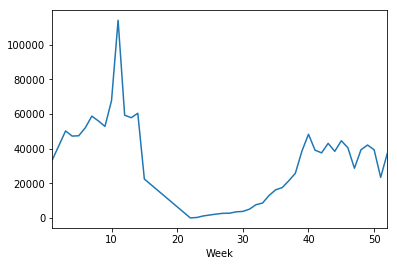

In [80]:
#Plotting number of rides
weekly_total_riders.sort_index().plot()

In [103]:
#Combining the weekly numbers of new riders and total rides
weekly_rider = pd.concat([weekly_new_riders, weekly_total_riders], axis=1)
weekly_rider.columns = ['first','total']

In [106]:
#Adding the column for percentage
weekly_rider['percentage']=weekly_rider['first']/weekly_rider['total']*100
weekly_rider_percent = weekly_rider['percentage']

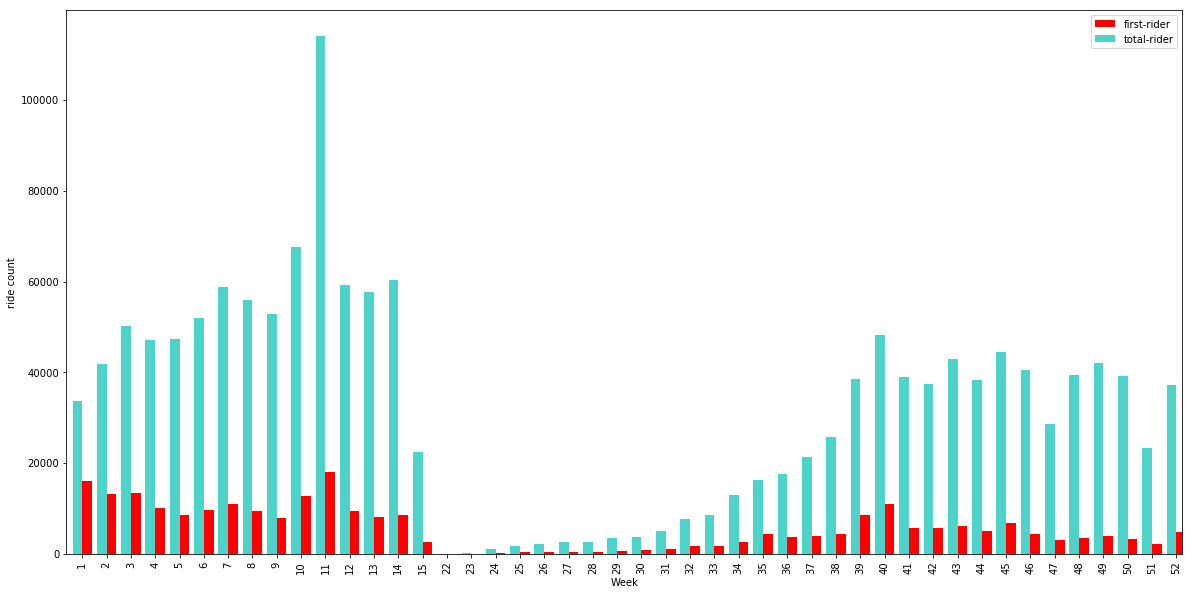

In [114]:
#Plotting New Riders vs total rides
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
weekly_new_riders = weekly_new_riders.sort_index()
weekly_total_riders = weekly_total_riders.sort_index()
weekly_new_riders.plot.bar(position=0, width=0.4, color='red', label='first-rider')
weekly_total_riders.plot.bar(position=1, width=0.4, color='#4DD3C9', label='total-rider')
plt.ylabel('ride count')
plt.legend()

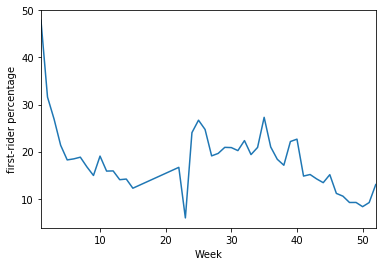

In [115]:
#Weekly percentage of new rides over total rides
weekly_rider_percent.plot()
plt.ylabel('first-rider percentage')

In [113]:
#Getting the mean
import numpy as np
np.mean(weekly_rider_percent)

18.25078170306312